In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df=pd.read_csv('/Users/jm/Downloads/NFLX_DS_9_23/NFLX  top10.csv')

df1=pd.read_csv('/Users/jm/Downloads/NFLX_DS_9_23/rating.csv')

df2=pd.read_csv('/Users/jm/Downloads/NFLX_DS_9_23/runtime.csv')


In [11]:
#look at top 10
df.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
0,Films (English),2,129110000,NaN,1,Red Notice,1/4/2022,11/21/2021
1,Films (English),1,20480000,NaN,2,There's Someone Inside Your House,1/4/2022,10/10/2021
2,TV (Non-English),1,10140000,Elite: Season 2,8,Elite,1/4/2022,7/4/2021
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2/22/2022,2/20/2022
4,TV (English),5,10480000,All American: Season 3,9,All American,1/4/2022,8/29/2021


In [14]:
#data types
df.dtypes

category                      object
cumulative_weeks_in_top_10     int64
weekly_hours_viewed            int64
season_title                  object
weekly_rank                    int64
show_title                    object
date_added                    object
week                          object
dtype: object

In [35]:
#identify the English TV show with the most appearances in the top 10 list
english_tv= df[df['category'] == 'TV (English)']
english_tv.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
3,TV (English),2,58960000,Love Is Blind: Season 2,2,Love Is Blind,2/22/2022,2/20/2022
4,TV (English),5,10480000,All American: Season 3,9,All American,1/4/2022,8/29/2021
20,TV (English),4,18770000,Locke & Key: Season 2,7,Locke & Key,1/4/2022,11/14/2021
21,TV (English),1,86730000,Sex/Life: Season 1,1,Sex/Life,1/4/2022,7/4/2021
29,TV (English),2,29680000,Atypical: Season 4,4,Atypical,1/4/2022,7/18/2021


In [28]:
result = english_tv.groupby('show_title').agg({
    'cumulative_weeks_in_top_10': 'count', 'weekly_hours_viewed': 'mean'})

In [29]:
most_appeared_show = result['cumulative_weeks_in_top_10'].idxmax()

In [30]:
#calculate average hours
average_hours_watched = result.loc[most_appeared_show, 'weekly_hours_viewed']

In [31]:
print("TV show with most appearances:", most_appeared_show)
print("Average weekly hours viewed:", average_hours_watched)

TV show with most appearances: You
Average weekly hours viewed: 43193333.333333336


In [36]:
#find the lowest rating for flims (non-english)
non_english_films= df[df['category'] == 'Films (Non-English)']
non_english_films.head()

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week
11,Films (Non-English),2,6760000,NaN,5,The Privilege,2/22/2022,2/20/2022
12,Films (Non-English),3,2000000,NaN,9,Lulli,1/18/2022,1/16/2022
14,Films (Non-English),2,7420000,NaN,4,Love and Leashes,2/22/2022,2/20/2022
16,Films (Non-English),3,7190000,NaN,5,Major Grom: Plague Doctor,1/4/2022,7/25/2021
17,Films (Non-English),1,7370000,NaN,2,Haseen Dillruba,1/4/2022,7/4/2021


In [49]:
#merge top10 and rating
merged_data = pd.merge(df, df1, left_on="show_title", right_on="title", how="inner")

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,rating
0,Films (English),2,129110000,NaN,1,Red Notice,1/4/2022,11/21/2021,Red Notice,6.3
1,Films (English),10,8710000,NaN,6,Red Notice,1/18/2022,1/16/2022,Red Notice,6.3
2,Films (English),1,148720000,NaN,1,Red Notice,1/4/2022,11/14/2021,Red Notice,6.3
3,Films (English),12,6540000,NaN,6,Red Notice,2/1/2022,1/30/2022,Red Notice,6.3
4,Films (English),11,7310000,NaN,8,Red Notice,1/25/2022,1/23/2022,Red Notice,6.3
...,...,...,...,...,...,...,...,...,...,...
1492,TV (Non-English),1,10630000,Into the Night: Season 2,8,Into the Night,1/4/2022,9/12/2021,Into the Night,7.1
1493,Films (English),1,44450000,NaN,1,The Weekend Away,3/9/2022,3/6/2022,The Weekend Away,5.6
1494,TV (English),1,11140000,Brand New Cherry Flavor: Limited Series,8,Brand New Cherry Flavor,1/4/2022,8/22/2021,Brand New Cherry Flavor,7.2
1495,Films (English),1,13690000,NaN,4,The Ice Road,1/4/2022,7/4/2021,The Ice Road,5.6


In [51]:
lowest_rated_film = merged_data[
    merged_data['category'] == 'Films (Non-English)'].sort_values(by='rating', ascending=True).iloc[0]

In [52]:
lowest_rated_film_title = lowest_rated_film['title']

In [53]:
average_hours_watched = lowest_rated_film['weekly_hours_viewed']

In [54]:
print("Lowest rated film in 'Films (Non-English)' category:", lowest_rated_film_title)
print("Average weekly hours viewed for that film:", average_hours_watched)

Lowest rated film in 'Films (Non-English)' category: Ilhados
Average weekly hours viewed for that film: 2240000


In [55]:
#identify the film in the “Films (English)” category with the most cumulative weeks
english_films=df[(df['category'] == 'Films (English)')]

In [56]:
most_appeared_film = english_films.sort_values(by='cumulative_weeks_in_top_10', ascending=False).iloc[0]

In [57]:
#merge top10 and runtime
merged_data2 = pd.merge(df, df2, left_on="show_title", right_on="title", how="inner")

,category,cumulative_weeks_in_top_10,weekly_hours_viewed,season_title,weekly_rank,show_title,date_added,week,title,runtime
0,Films (English),2,129110000,NaN,1,Red Notice,1/4/2022,11/21/2021,Red Notice,118
1,Films (English),10,8710000,NaN,6,Red Notice,1/18/2022,1/16/2022,Red Notice,118
2,Films (English),1,148720000,NaN,1,Red Notice,1/4/2022,11/14/2021,Red Notice,118
3,Films (English),12,6540000,NaN,6,Red Notice,2/1/2022,1/30/2022,Red Notice,118
4,Films (English),11,7310000,NaN,8,Red Notice,1/25/2022,1/23/2022,Red Notice,118
...,...,...,...,...,...,...,...,...,...,...
1492,TV (Non-English),1,10630000,Into the Night: Season 2,8,Into the Night,1/4/2022,9/12/2021,Into the Night,0
1493,Films (English),1,44450000,NaN,1,The Weekend Away,3/9/2022,3/6/2022,The Weekend Away,89
1494,TV (English),1,11140000,Brand New Cherry Flavor: Limited Series,8,Brand New Cherry Flavor,1/4/2022,8/22/2021,Brand New Cherry Flavor,342
1495,Films (English),1,13690000,NaN,4,The Ice Road,1/4/2022,7/4/2021,The Ice Road,109


In [68]:
film_title = most_appeared_film['show_title']

In [77]:
film_runtime = merged_data2[merged_data2['show_title'] == film_title]['runtime'].values[0]

In [78]:
print("Film runtime:", film_runtime)

Film runtime: 118


In [91]:
#calculate the total minutes have played 
weekly_hours_viewed = most_appeared_film['weekly_hours_viewed']
cumulative_weeks = most_appeared_film['cumulative_weeks_in_top_10']

weekly_minutes_watched = weekly_hours_viewed * 60

In [92]:
#calculate the estimated viewers
estimated_viewers = weekly_minutes_viewed / film_runtime

In [106]:
print("Films (English)'with most cumulative weeks:", most_appeared_film['show_title'])
print("Estimated number of viewers for that film:", estimated_viewers)

Films (English)'with most cumulative weeks: Red Notice
Estimated number of viewers for that film: 194393.74185136898


The “Films (English)” category with the most cumulative weeks in the top 10 is Red Notice. To calculate the number of users has watched this film, I assumed the average weekly viewed time equals to the runtime, plus weekly viewed hours and total weeks of playing are known. Therefore, the total time of Red Notice has played can be calculated. And the number of viewers can be calculated as the total time during the duration (in minutes) divided by runtime. However, there are potential risk such as users’ behavior habits might influence the actual number.

In [102]:
#plot weekly hous viewed over time
df['week'] = pd.to_datetime(df['week'])

trend_data = df.groupby(['category', 'week'])['weekly_hours_viewed'].sum()

In [103]:
trend_data = trend_data.unstack('category')

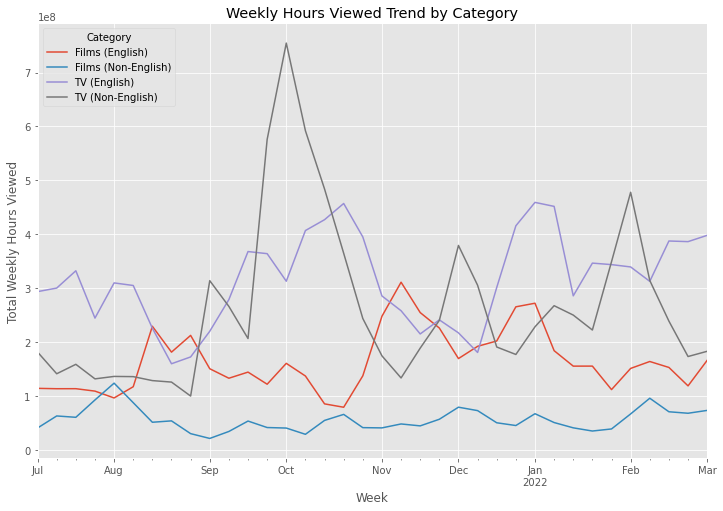

In [105]:
trend_data.plot(kind='line', ax=plt.gca())
plt.title("Weekly Hours Viewed Trend by Category")
plt.xlabel("Week")
plt.ylabel("Total Weekly Hours Viewed")
plt.legend(title="Category", loc='upper left')
plt.show()

Over the past six months, Netflix has witnessed distinct viewing trends across different content categories. "Films (Non-English)" remained relatively stable with minimal fluctuations, indicating a consistent interest in non-English content. In contrast, "TV (English)," "TV (Non-English)," and "Films (English)" experienced significant fluctuations in viewing hours, displaying a gradual upward trend. Notably, "TV (Non-English)" reached its peak in October 2021 due to the popularity of the Korean drama "Squid Game," which attracted a substantial viewership. Furthermore, "TV (Non-English)" exhibited noticeable peaks in December 2021 and February 2022, likely due to other hit non-English shows. "TV (English)" continues to be Netflix's mainstream content, maintaining higher viewing times compared to other categories. Films tend to have shorter viewing durations, possibly due to their shorter runtimes.